## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from wordcloud import WordCloud
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Null values are present in our dataset.

In [6]:
df.shape

(8807, 12)

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

As a large no. of values in director column are missing we will not drop the missing values.

In [8]:
imputer = SimpleImputer(strategy='most_frequent')
df['rating'] = imputer.fit_transform(df[['rating']]).ravel()

In [9]:
df= df.dropna(subset=['date_added', 'duration'])

We will need director, cast and country columns for content-based recommendation therefore creating a new category for all the null values and specifying them with "Others"

In [10]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna("Others")
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Others,Others,Others,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.shape

(8794, 12)

In [13]:
df.duplicated().sum()

0

No duplicates present.

In [14]:
df.nunique()

show_id         8794
type               2
title           8794
director        4528
cast            7682
country          749
date_added      1766
release_year      74
rating            14
duration         220
listed_in        513
description     8762
dtype: int64

In [15]:
df['type'].value_counts()

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

In [16]:
df.rename(columns={'listed_in': 'genre'}, inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Others,Others,Others,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Exploratory Data Analysis

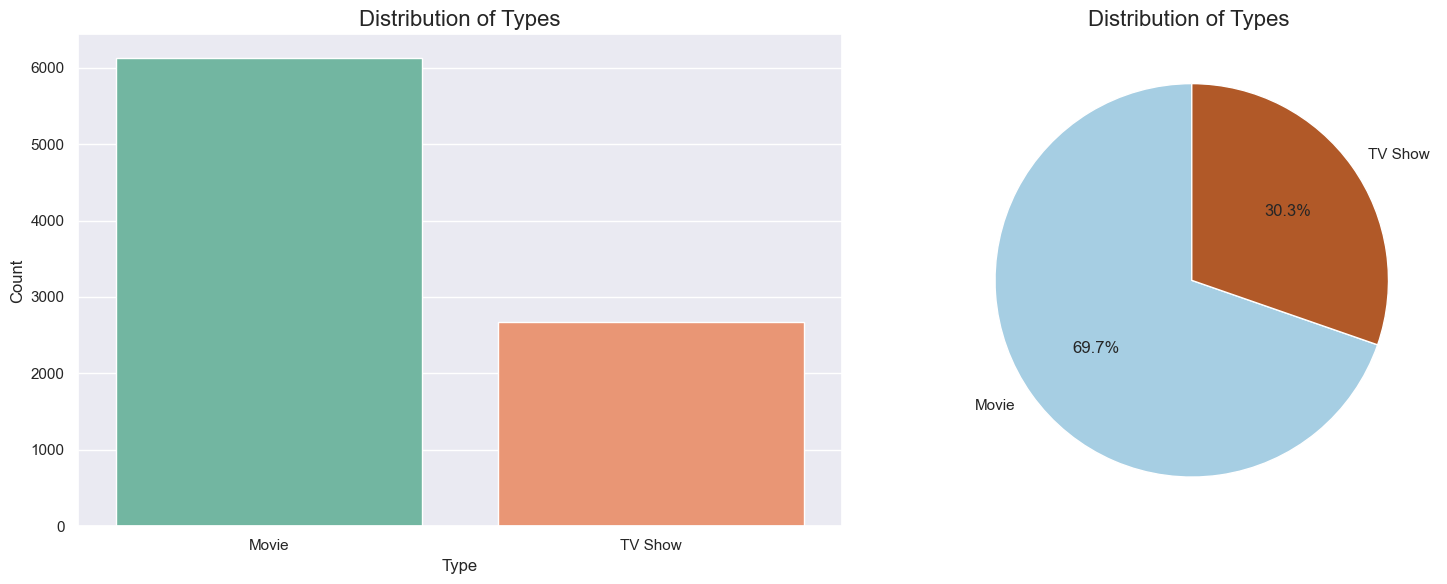

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='type', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Types', fontsize=16)
axes[0].set_xlabel('Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

type_counts = df['type'].value_counts()
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1], cmap='Paired')
axes[1].set_title('Distribution of Types ', fontsize=16)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

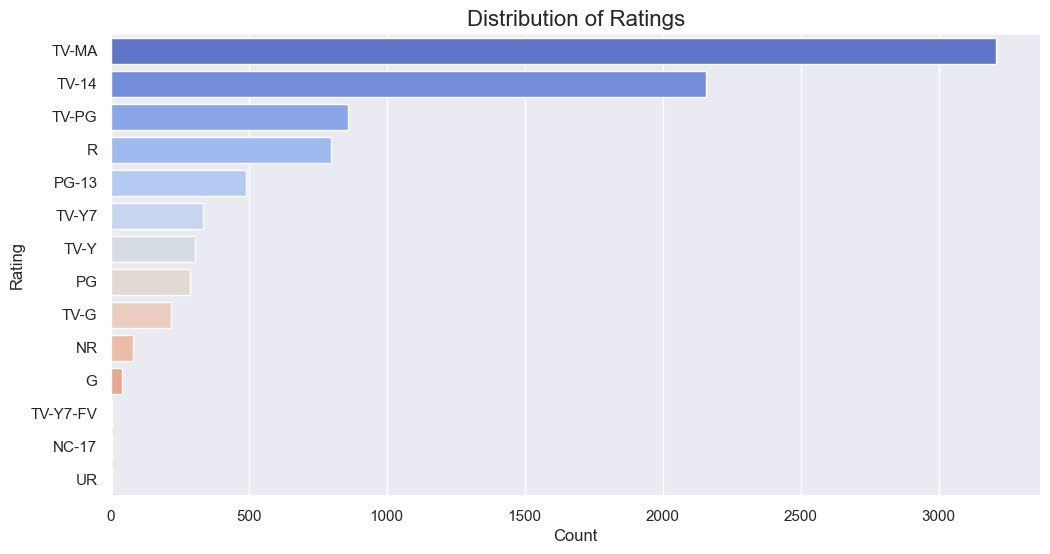

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

As "UR", "NC-17", "TV-Y7-FV", "G", "NR" have less values we will put in a single category.

In [19]:
ratings_to_combine = ["UR", "NC-17", "TV-Y7-FV"]
df['rating'] = df['rating'].apply(lambda x: 'Other' if x in ratings_to_combine else x)

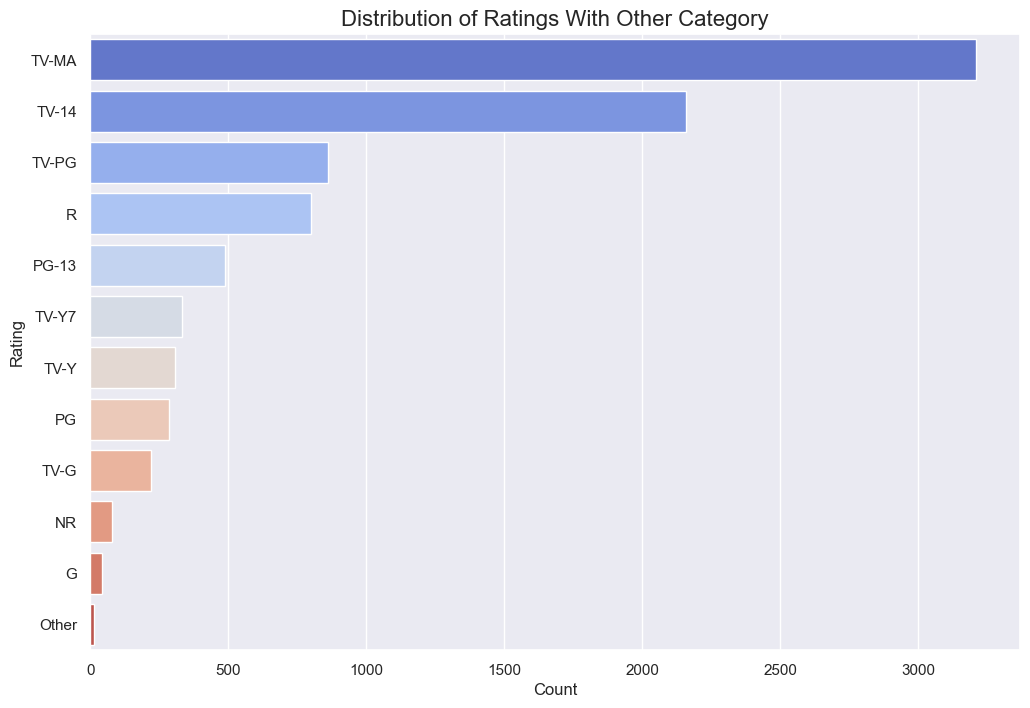

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Ratings With Other Category', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

In [21]:
director_counts = df['director'].value_counts()
director_counts

director
Others                            2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

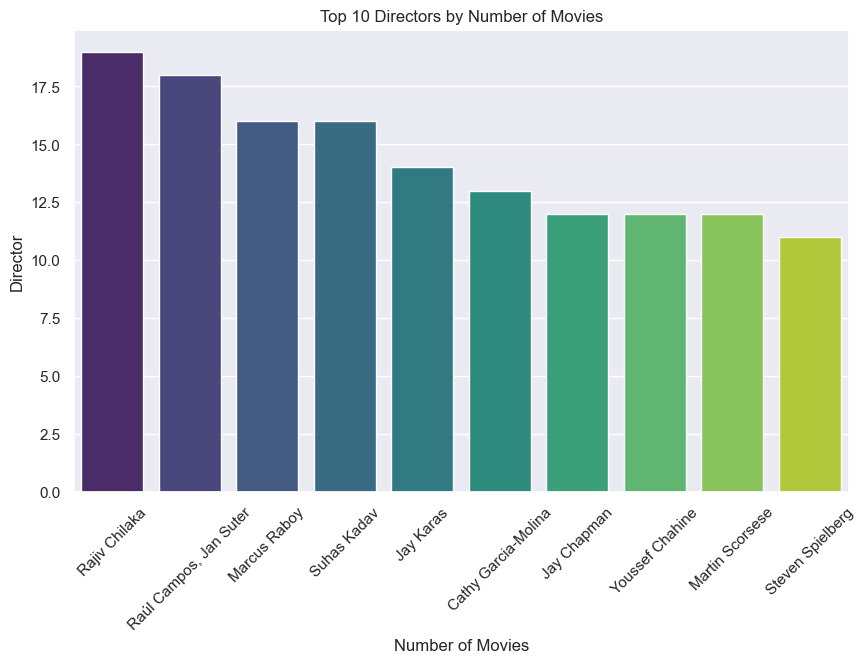

In [22]:
director_counts = director_counts[1:11]
plt.figure(figsize=(10,6))
sns.barplot(x=director_counts.index, y=director_counts.values, palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Movies')
plt.xticks(rotation=45) 
plt.show()

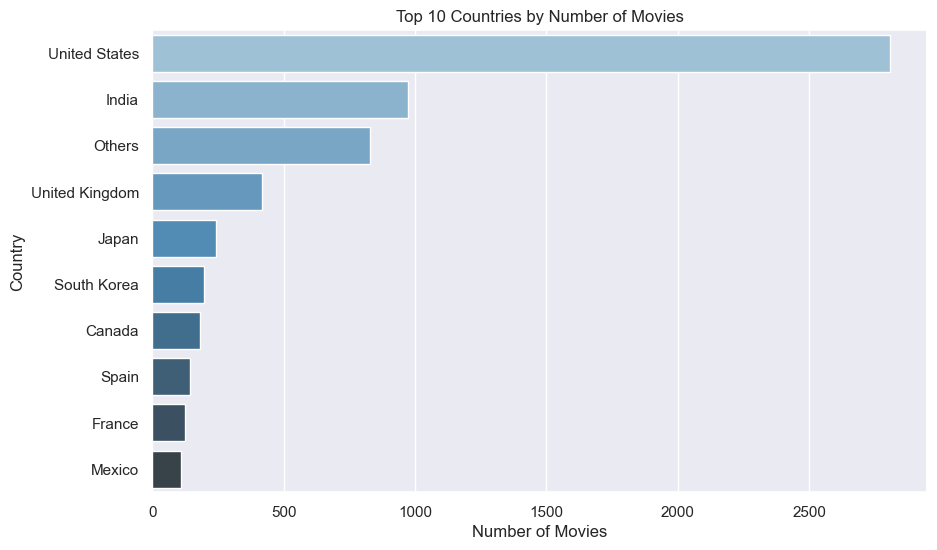

In [23]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='Blues_d')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Movies')
plt.show()

As shown in the chart, US is clearly the sominant country in terms of movie production, with a significantly higher number of films compared to other countries. This highlights the global influence and central role of Hollywood in the film industry.

Other countries like India, United Kingdom, Japan and South Korea also have a notable presence in the top 10, but their movie count remains much lower than that of the US.

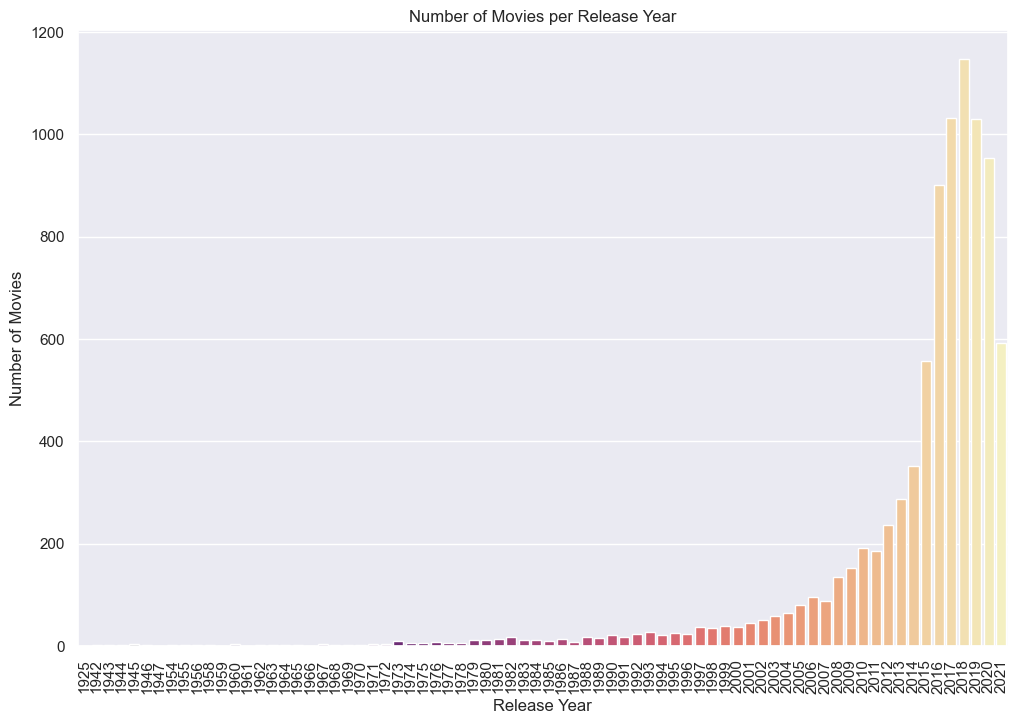

In [24]:
release_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,8))
sns.barplot(x=release_year_counts.index, y=release_year_counts.values, palette='magma')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Release Year')
plt.xticks(rotation=90)  
plt.show()

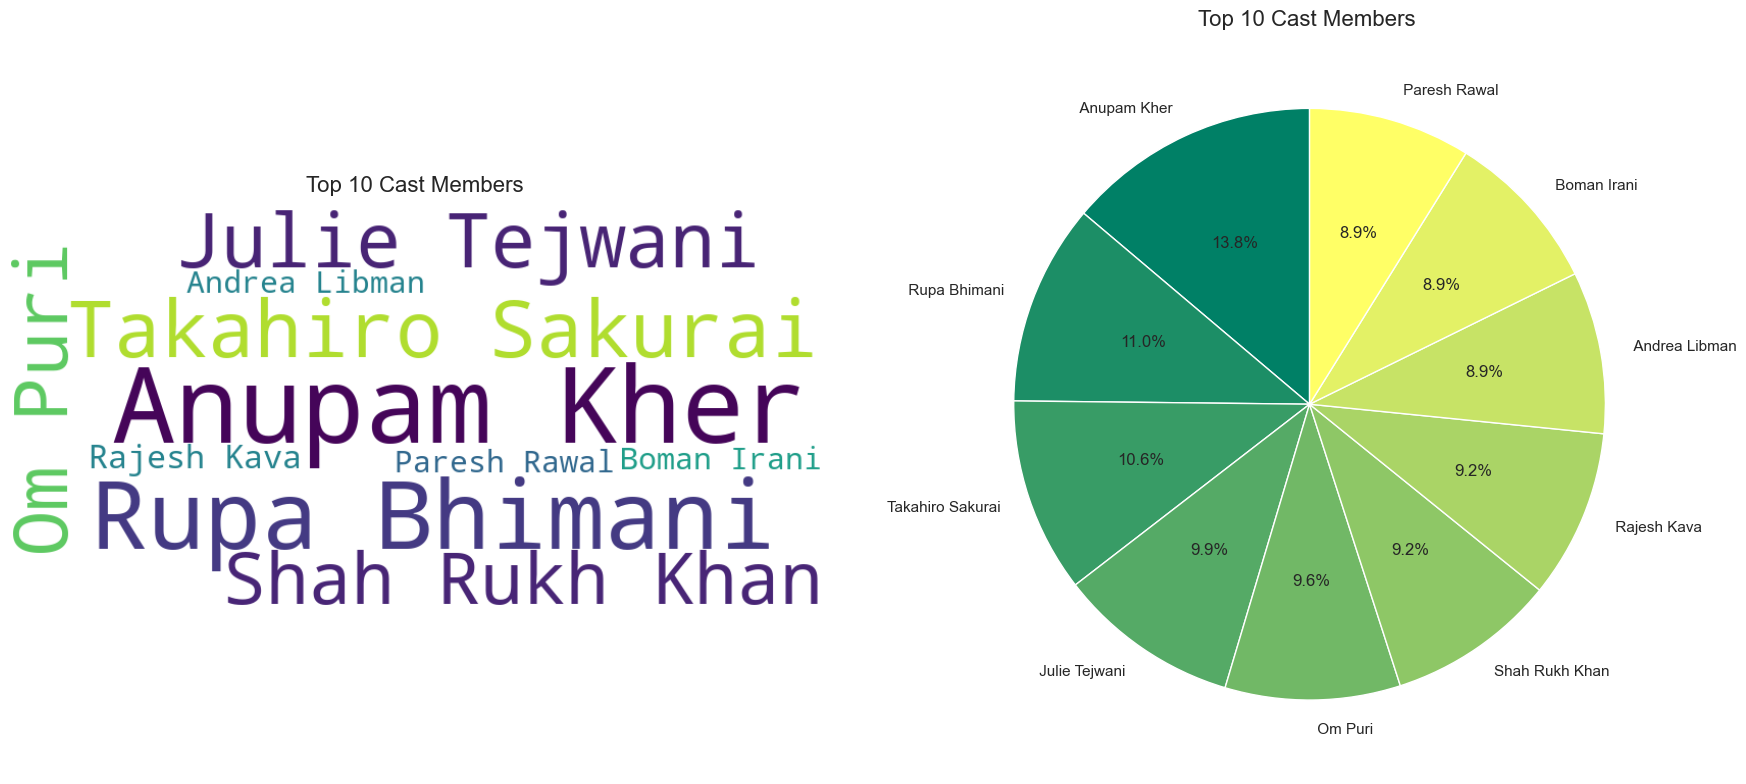

In [25]:
cast_counts = df['cast'].str.split(',').explode().value_counts()[1:11]
cast_dict = cast_counts.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cast_dict)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Top 10 Cast Members ', fontsize=16)

cast_counts = df['cast'].str.split(',').explode().value_counts()[1:11]
cast_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='summer', labels=cast_counts.index, ax=axes[1])
axes[1].set_title('Top 10 Cast Members ', fontsize=16)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

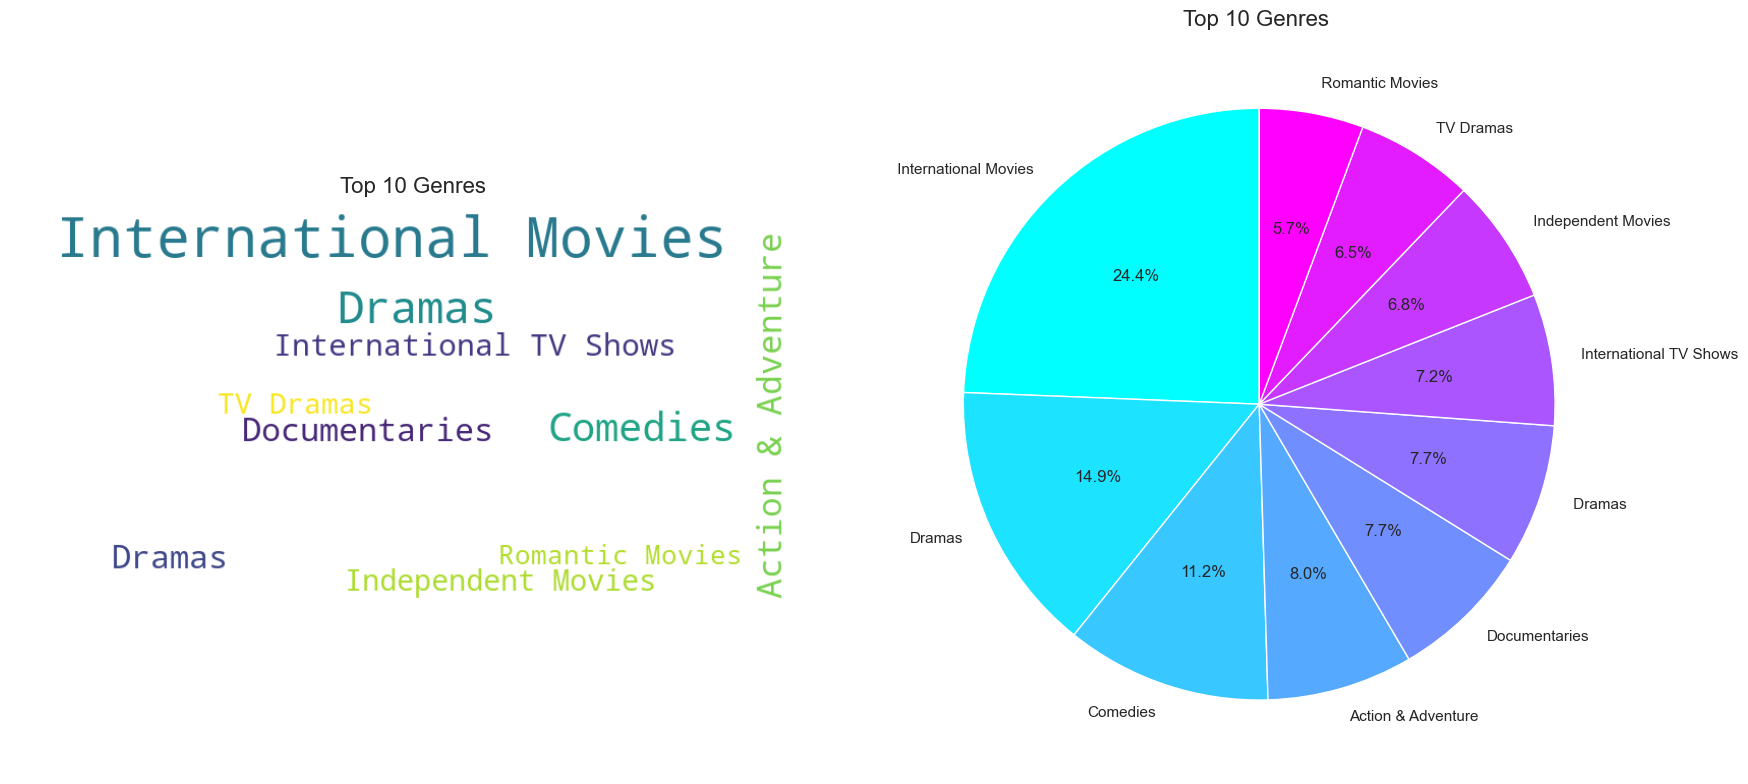

In [26]:
genre_counts = df['genre'].str.split(',').explode().value_counts().head(10)
genre_dict = genre_counts.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_dict)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Top 10 Genres ', fontsize=16)

genre_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='cool', labels=genre_counts.index, ax=axes[1])
axes[1].set_title('Top 10 Genres ', fontsize=16)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

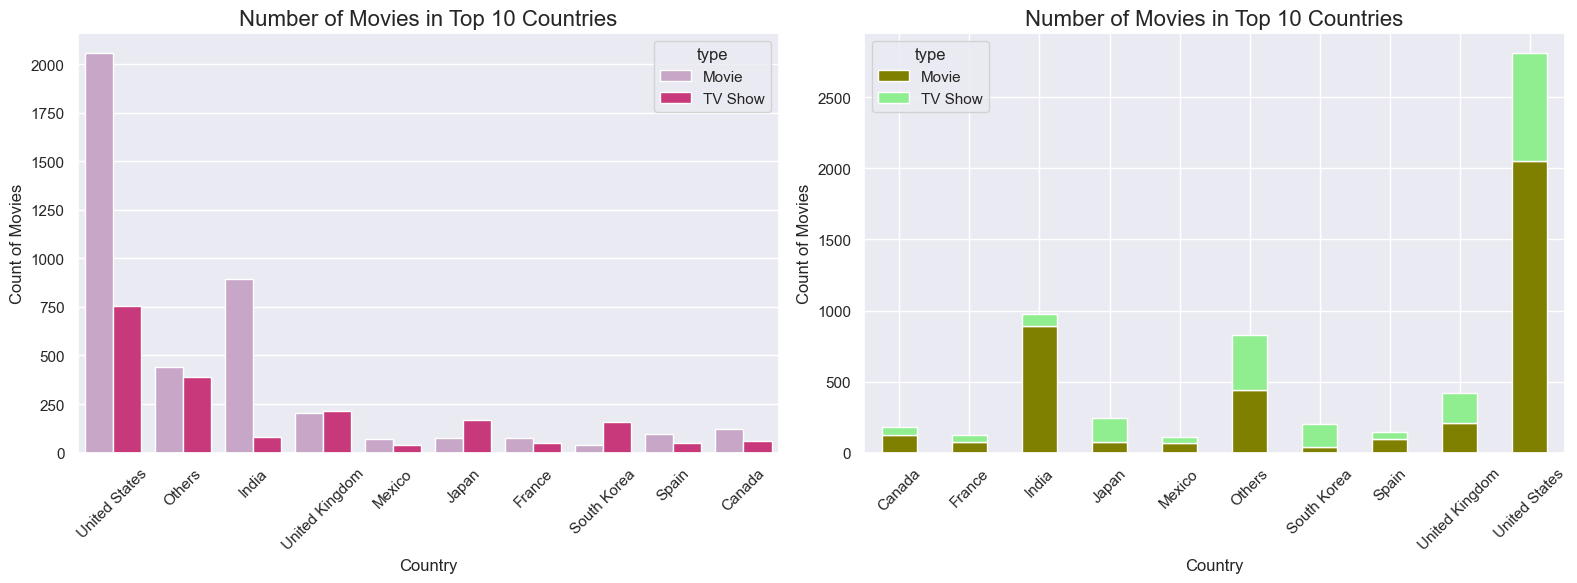

In [27]:
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='country', hue='type', data=df_top_countries, palette='PuRd', ax=axes[0])
axes[0].set_title('Number of Movies in Top 10 Countries', fontsize=16)
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Count of Movies', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)


country_type_counts = df_top_countries.groupby(['country', 'type']).size().unstack(fill_value=0)

country_type_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['olive', 'lightgreen'], legend=True)
axes[1].set_title('Number of Movies in Top 10 Countries', fontsize=16)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Count of Movies', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

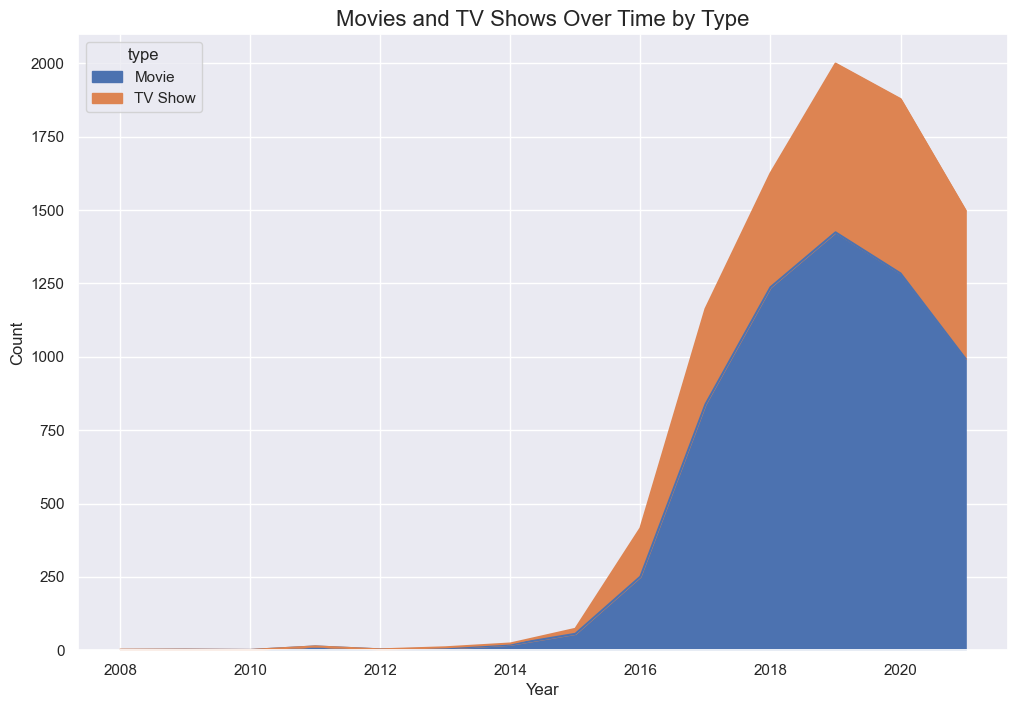

In [28]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
type_over_time = df.groupby([df['date_added'].dt.year, 'type']).size().unstack()
type_over_time.plot(kind='area', stacked=True, figsize=(12, 8))

plt.title('Movies and TV Shows Over Time by Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [29]:
import pickle 
pickle.dump(df, open('shows.pkl','wb'))

# Content Based Recommendation

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Others,Others,Others,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


* useful columns --> show_id, type, title, director, cast, country, release_year, rating, genre, description

In [31]:
df = df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'release_year', 'rating', 'genre', 'description']]
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Others,Others,Others,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
df['description'] = df['description'].apply(lambda x:x.split())
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2020,PG-13,Documentaries,"[As, her, father, nears, the, end, of, his, li..."
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TV Show,Jailbirds New Orleans,Others,Others,Others,2021,TV-MA,"Docuseries, Reality TV","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...","[In, a, city, of, coaching, centers, known, to..."


In [33]:
df['type'] = df['type'].apply(lambda x:x.replace(" ",""))
df['director'] = df['director'].apply(lambda x:x.replace(" ",""))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,Others,United States,2020,PG-13,Documentaries,"[As, her, father, nears, the, end, of, his, li..."
1,s2,TVShow,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TVShow,Ganglands,JulienLeclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TVShow,Jailbirds New Orleans,Others,Others,Others,2021,TV-MA,"Docuseries, Reality TV","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TVShow,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...","[In, a, city, of, coaching, centers, known, to..."


In [34]:
df['cast'] = df['cast'].apply(lambda x:x.replace(" ",""))
df['cast'] = df['cast'].apply(lambda x:x.split(","))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,[Others],United States,2020,PG-13,Documentaries,"[As, her, father, nears, the, end, of, his, li..."
1,s2,TVShow,Blood & Water,Others,"[AmaQamata, KhosiNgema, GailMabalane, ThabangM...",South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TVShow,Ganglands,JulienLeclercq,"[SamiBouajila, TracyGotoas, SamuelJouy, Nabiha...",Others,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TVShow,Jailbirds New Orleans,Others,[Others],Others,2021,TV-MA,"Docuseries, Reality TV","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TVShow,Kota Factory,Others,"[MayurMore, JitendraKumar, RanjanRaj, AlamKhan...",India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...","[In, a, city, of, coaching, centers, known, to..."


In [35]:
df['country'] = df['country'].apply(lambda x:x.replace(" ",""))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,[Others],UnitedStates,2020,PG-13,Documentaries,"[As, her, father, nears, the, end, of, his, li..."
1,s2,TVShow,Blood & Water,Others,"[AmaQamata, KhosiNgema, GailMabalane, ThabangM...",SouthAfrica,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TVShow,Ganglands,JulienLeclercq,"[SamiBouajila, TracyGotoas, SamuelJouy, Nabiha...",Others,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TVShow,Jailbirds New Orleans,Others,[Others],Others,2021,TV-MA,"Docuseries, Reality TV","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TVShow,Kota Factory,Others,"[MayurMore, JitendraKumar, RanjanRaj, AlamKhan...",India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...","[In, a, city, of, coaching, centers, known, to..."


In [36]:
df['rating'] = df['rating'].apply(lambda x:x.replace("-",""))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,[Others],UnitedStates,2020,PG13,Documentaries,"[As, her, father, nears, the, end, of, his, li..."
1,s2,TVShow,Blood & Water,Others,"[AmaQamata, KhosiNgema, GailMabalane, ThabangM...",SouthAfrica,2021,TVMA,"International TV Shows, TV Dramas, TV Mysteries","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TVShow,Ganglands,JulienLeclercq,"[SamiBouajila, TracyGotoas, SamuelJouy, Nabiha...",Others,2021,TVMA,"Crime TV Shows, International TV Shows, TV Act...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TVShow,Jailbirds New Orleans,Others,[Others],Others,2021,TVMA,"Docuseries, Reality TV","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TVShow,Kota Factory,Others,"[MayurMore, JitendraKumar, RanjanRaj, AlamKhan...",India,2021,TVMA,"International TV Shows, Romantic TV Shows, TV ...","[In, a, city, of, coaching, centers, known, to..."


In [37]:
df['genre'] = df['genre'].apply(lambda x:x.replace(" ",""))
df['genre'] = df['genre'].apply(lambda x:x.split(","))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,[Others],UnitedStates,2020,PG13,[Documentaries],"[As, her, father, nears, the, end, of, his, li..."
1,s2,TVShow,Blood & Water,Others,"[AmaQamata, KhosiNgema, GailMabalane, ThabangM...",SouthAfrica,2021,TVMA,"[InternationalTVShows, TVDramas, TVMysteries]","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TVShow,Ganglands,JulienLeclercq,"[SamiBouajila, TracyGotoas, SamuelJouy, Nabiha...",Others,2021,TVMA,"[CrimeTVShows, InternationalTVShows, TVAction&...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TVShow,Jailbirds New Orleans,Others,[Others],Others,2021,TVMA,"[Docuseries, RealityTV]","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TVShow,Kota Factory,Others,"[MayurMore, JitendraKumar, RanjanRaj, AlamKhan...",India,2021,TVMA,"[InternationalTVShows, RomanticTVShows, TVCome...","[In, a, city, of, coaching, centers, known, to..."


In [38]:
def convert(obj):
    obj = obj[0:3]
    return obj

In [39]:
df['cast']=df['cast'].apply(convert)

In [40]:
df['cast']

0                                             [Others]
1                [AmaQamata, KhosiNgema, GailMabalane]
2              [SamiBouajila, TracyGotoas, SamuelJouy]
3                                             [Others]
4                [MayurMore, JitendraKumar, RanjanRaj]
                             ...                      
8802    [MarkRuffalo, JakeGyllenhaal, RobertDowneyJr.]
8803                                          [Others]
8804       [JesseEisenberg, WoodyHarrelson, EmmaStone]
8805              [TimAllen, CourteneyCox, ChevyChase]
8806    [VickyKaushal, Sarah-JaneDias, RaaghavChanana]
Name: cast, Length: 8794, dtype: object

In [41]:
df['cast'] = df['cast'].apply(lambda x:" ".join(x))
df['genre'] = df['genre'].apply(lambda x:" ".join(x))
df['description'] = df['description'].apply(lambda x:" ".join(x))
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,Others,UnitedStates,2020,PG13,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TVShow,Blood & Water,Others,AmaQamata KhosiNgema GailMabalane,SouthAfrica,2021,TVMA,InternationalTVShows TVDramas TVMysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TVShow,Ganglands,JulienLeclercq,SamiBouajila TracyGotoas SamuelJouy,Others,2021,TVMA,CrimeTVShows InternationalTVShows TVAction&Adv...,To protect his family from a powerful drug lor...
3,s4,TVShow,Jailbirds New Orleans,Others,Others,Others,2021,TVMA,Docuseries RealityTV,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TVShow,Kota Factory,Others,MayurMore JitendraKumar RanjanRaj,India,2021,TVMA,InternationalTVShows RomanticTVShows TVComedies,In a city of coaching centers known to train I...


In [42]:
df['tags'] = df['type'] + " " + df['director']+ " " + df['cast']+ " " + df['country'] + " "+ df['rating']+ " " + df['genre'] + " "+ df['description']

In [43]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description,tags
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,Others,UnitedStates,2020,PG13,Documentaries,"As her father nears the end of his life, filmm...",Movie KirstenJohnson Others UnitedStates PG13 ...
1,s2,TVShow,Blood & Water,Others,AmaQamata KhosiNgema GailMabalane,SouthAfrica,2021,TVMA,InternationalTVShows TVDramas TVMysteries,"After crossing paths at a party, a Cape Town t...",TVShow Others AmaQamata KhosiNgema GailMabalan...
2,s3,TVShow,Ganglands,JulienLeclercq,SamiBouajila TracyGotoas SamuelJouy,Others,2021,TVMA,CrimeTVShows InternationalTVShows TVAction&Adv...,To protect his family from a powerful drug lor...,TVShow JulienLeclercq SamiBouajila TracyGotoas...
3,s4,TVShow,Jailbirds New Orleans,Others,Others,Others,2021,TVMA,Docuseries RealityTV,"Feuds, flirtations and toilet talk go down amo...",TVShow Others Others Others TVMA Docuseries Re...
4,s5,TVShow,Kota Factory,Others,MayurMore JitendraKumar RanjanRaj,India,2021,TVMA,InternationalTVShows RomanticTVShows TVComedies,In a city of coaching centers known to train I...,TVShow Others MayurMore JitendraKumar RanjanRa...


In [44]:
scaler = MinMaxScaler()
df['release_year_normalized'] = scaler.fit_transform(df[['release_year']])
df.head()

,show_id,type,title,director,cast,country,release_year,rating,genre,description,tags,release_year_normalized
0,s1,Movie,Dick Johnson Is Dead,KirstenJohnson,Others,UnitedStates,2020,PG13,Documentaries,"As her father nears the end of his life, filmm...",Movie KirstenJohnson Others UnitedStates PG13 ...,0.989583
1,s2,TVShow,Blood & Water,Others,AmaQamata KhosiNgema GailMabalane,SouthAfrica,2021,TVMA,InternationalTVShows TVDramas TVMysteries,"After crossing paths at a party, a Cape Town t...",TVShow Others AmaQamata KhosiNgema GailMabalan...,1.000000
2,s3,TVShow,Ganglands,JulienLeclercq,SamiBouajila TracyGotoas SamuelJouy,Others,2021,TVMA,CrimeTVShows InternationalTVShows TVAction&Adv...,To protect his family from a powerful drug lor...,TVShow JulienLeclercq SamiBouajila TracyGotoas...,1.000000
3,s4,TVShow,Jailbirds New Orleans,Others,Others,Others,2021,TVMA,Docuseries RealityTV,"Feuds, flirtations and toilet talk go down amo...",TVShow Others Others Others TVMA Docuseries Re...,1.000000
4,s5,TVShow,Kota Factory,Others,MayurMore JitendraKumar RanjanRaj,India,2021,TVMA,InternationalTVShows RomanticTVShows TVComedies,In a city of coaching centers known to train I...,TVShow Others MayurMore JitendraKumar RanjanRa...,1.000000


In [45]:
new_df = df[['show_id', 'title', 'release_year_normalized', 'tags']]
new_df

,show_id,title,release_year_normalized,tags
0,s1,Dick Johnson Is Dead,0.989583,Movie KirstenJohnson Others UnitedStates PG13 ...
1,s2,Blood & Water,1.000000,TVShow Others AmaQamata KhosiNgema GailMabalan...
2,s3,Ganglands,1.000000,TVShow JulienLeclercq SamiBouajila TracyGotoas...
3,s4,Jailbirds New Orleans,1.000000,TVShow Others Others Others TVMA Docuseries Re...
4,s5,Kota Factory,1.000000,TVShow Others MayurMore JitendraKumar RanjanRa...
...,...,...,...,...
8802,s8803,Zodiac,0.854167,Movie DavidFincher MarkRuffalo JakeGyllenhaal ...
8803,s8804,Zombie Dumb,0.968750,TVShow Others Others Others TVY7 Kids'TV Korea...
8804,s8805,Zombieland,0.875000,Movie RubenFleischer JesseEisenberg WoodyHarre...
8805,s8806,Zoom,0.843750,Movie PeterHewitt TimAllen CourteneyCox ChevyC...


In [46]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
new_df

,show_id,title,release_year_normalized,tags
0,s1,Dick Johnson Is Dead,0.989583,movie kirstenjohnson others unitedstates pg13 ...
1,s2,Blood & Water,1.000000,tvshow others amaqamata khosingema gailmabalan...
2,s3,Ganglands,1.000000,tvshow julienleclercq samibouajila tracygotoas...
3,s4,Jailbirds New Orleans,1.000000,tvshow others others others tvma docuseries re...
4,s5,Kota Factory,1.000000,tvshow others mayurmore jitendrakumar ranjanra...
...,...,...,...,...
8802,s8803,Zodiac,0.854167,movie davidfincher markruffalo jakegyllenhaal ...
8803,s8804,Zombie Dumb,0.968750,tvshow others others others tvy7 kids'tv korea...
8804,s8805,Zombieland,0.875000,movie rubenfleischer jesseeisenberg woodyharre...
8805,s8806,Zoom,0.843750,movie peterhewitt timallen courteneycox chevyc...


## Stemming

In [47]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [48]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [49]:
new_df['tags'] = new_df['tags'].apply(stem)

In [50]:
new_df = new_df.reset_index(drop=True)
new_df.head()

,show_id,title,release_year_normalized,tags
0,s1,Dick Johnson Is Dead,0.989583,movi kirstenjohnson other unitedst pg13 docume...
1,s2,Blood & Water,1.000000,tvshow other amaqamata khosingema gailmabalan ...
2,s3,Ganglands,1.000000,tvshow julienleclercq samibouajila tracygotoa ...
3,s4,Jailbirds New Orleans,1.000000,tvshow other other other tvma docuseri reality...
4,s5,Kota Factory,1.000000,tvshow other mayurmor jitendrakumar ranjanraj ...


## Vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [52]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [53]:
vectors.shape

(8794, 5000)

In [54]:
new_df.shape

(8794, 4)

In [55]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
release_year_normalized = new_df['release_year_normalized'].values.reshape(-1, 1)
combined_vectors = np.hstack([vectors, release_year_normalized])
combined_vectors.shape

(8794, 5001)

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
similarity = cosine_similarity(combined_vectors)
similarity

array([[1.        , 0.04500226, 0.2087233 , ..., 0.14503135, 0.17973975,
        0.36381347],
       [0.04500226, 1.        , 0.1672484 , ..., 0.0442595 , 0.03952686,
        0.0343396 ],
       [0.2087233 , 0.1672484 , 1.        , ..., 0.08724175, 0.03635942,
        0.23375001],
       ...,
       [0.14503135, 0.0442595 , 0.08724175, ..., 1.        , 0.19488195,
        0.0741978 ],
       [0.17973975, 0.03952686, 0.03635942, ..., 0.19488195, 1.        ,
        0.06761212],
       [0.36381347, 0.0343396 , 0.23375001, ..., 0.0741978 , 0.06761212,
        1.        ]])

In [59]:
cosine_similarity(combined_vectors).shape 

(8794, 8794)

In [60]:
def recommend(show):
    show_index = new_df[new_df['title'] == show].index[0]
    distances = similarity[show_index]
    show_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
                         
    for i in show_list:
        print(new_df.iloc[i[0]].title)

In [61]:
recommend('Taare Zameen Par')

3 Idiots
Mucize
Talaash
Dangal
Koi Aap Sa


In [62]:
pickle.dump(new_df.to_dict(), open('shows_modified.pkl','wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))